# Gráfica asociada a datos

**Nombre:** Heriberto Espino Montelongo

**Materia:** Análisis Discreto

**Clave:** O24-LDS1011-1

**Fecha:** 4 de diciembre de 2024

#### Contenido de la actividad

El siguiente archivo consiste de un conjunto $D$ de 145 pacientes (filas), cada uno puede ser representado como un punto en $\R^5$ (omitiendo las columnas de "Patient number" y "Clinical Classification"). Realice un programa para construir la gráfica $G_r(D)=(V,E)$ en donde los vértices son los elementos de $D$ y dados $p_i, p,j \in D$, $(p_i, p,j) \in E$ si y sólo si su distancia es menor que $r$, donde $r > 0$.

Diabetes.csv


Sugerencia: Puede definir la matriz $D=(d_{ij})$ de distancias, donde $d_{ij} = ||p_i - p_j||$.

In [11]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


In [12]:

# Load the data
df = pd.read_csv('Diabetes.csv')

# Extract the relevant columns (omit 'Patient number' and 'Clinical Classification')
data = df.iloc[:, 1:6].values

# Define the threshold distance r
r = 50  # You can change this value as needed

In [13]:

def create_graph(data, r):
    # Manually compute the distance matrix
    dist_matrix_manual = np.zeros((len(data), len(data)))

    for i in range(len(data)):
        for j in range(len(data)):
            dist_matrix_manual[i, j] = np.sqrt(np.sum((data[i] - data[j]) ** 2))

    # Create the graph manually
    G_manual = nx.Graph()

    # Add nodes
    for i in range(len(data)):
        G_manual.add_node(i)

    # Add edges based on the distance threshold
    for i in range(len(data)):
        for j in range(i + 1, len(data)):
            if dist_matrix_manual[i, j] < r:
                G_manual.add_edge(i, j)

    return G_manual

# Example usage
G_manual = create_graph(data, r)

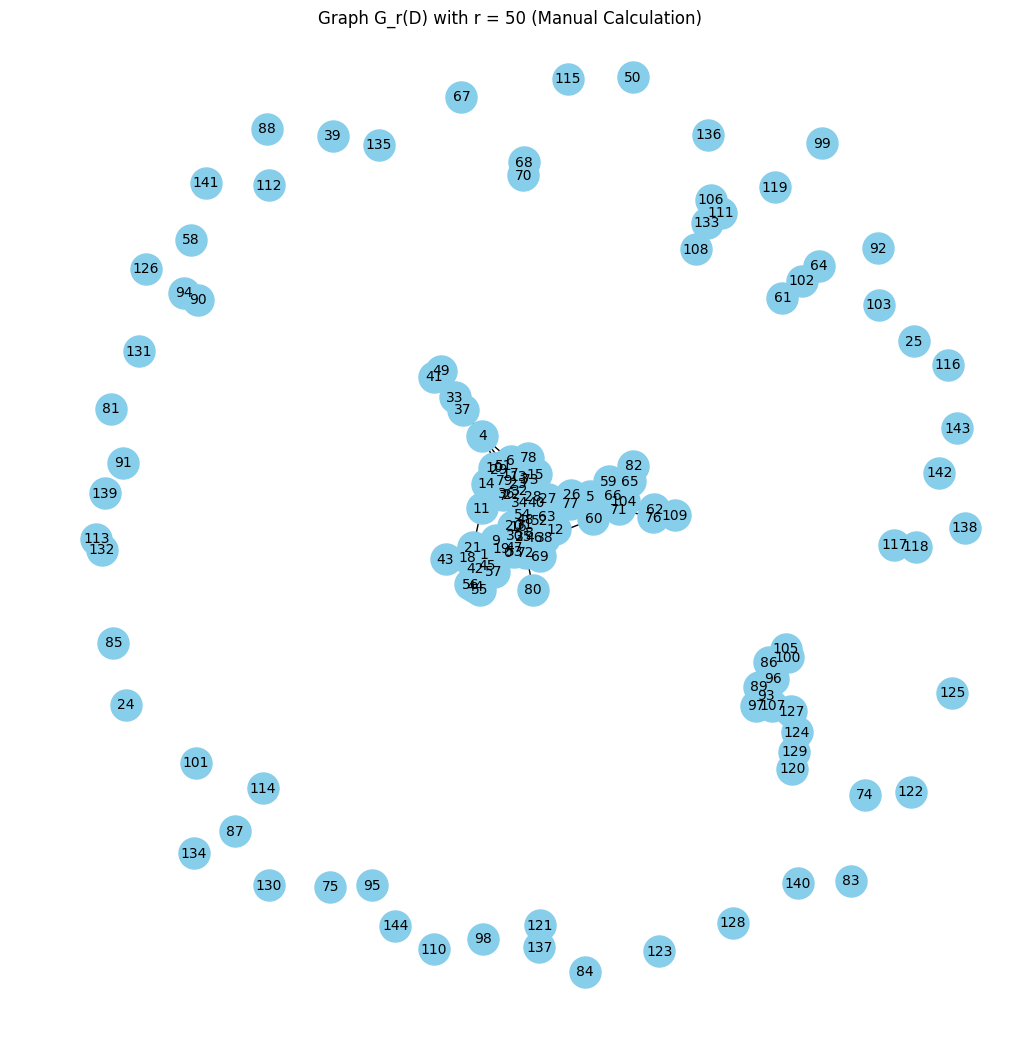

In [14]:
# Draw the graph
plt.figure(figsize=(10, 10))
nx.draw(G_manual, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_color='black')
plt.title(f'Graph G_r(D) with r = {r} (Manual Calculation)')
plt.show()

In [15]:
class CustomGraph:
    def __init__(self):
        self.nodes = set()
        self.edges = {}

    def add_node(self, node):
        self.nodes.add(node)
        if node not in self.edges:
            self.edges[node] = []

    def add_edge(self, node1, node2):
        if node1 in self.nodes and node2 in self.nodes:
            self.edges[node1].append(node2)
            self.edges[node2].append(node1)

    def get_edges(self):
        edge_list = []
        for node in self.edges:
            for neighbor in self.edges[node]:
                if (neighbor, node) not in edge_list:
                    edge_list.append((node, neighbor))
        return edge_list

    def __str__(self):
        return f"Nodes: {self.nodes}\nEdges: {self.get_edges()}"

def create_custom_graph(data, r):
    # Manually compute the distance matrix
    dist_matrix_manual = np.zeros((len(data), len(data)))

    for i in range(len(data)):
        for j in range(len(data)):
            dist_matrix_manual[i, j] = np.sqrt(np.sum((data[i] - data[j]) ** 2))

    # Create the custom graph
    G_custom = CustomGraph()

    # Add nodes
    for i in range(len(data)):
        G_custom.add_node(i)

    # Add edges based on the distance threshold
    for i in range(len(data)):
        for j in range(i + 1, len(data)):
            if dist_matrix_manual[i, j] < r:
                G_custom.add_edge(i, j)

    return G_custom

# Example usage
G_custom = create_custom_graph(data, r)
print(G_custom)

Nodes: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144}
Edges: [(0, 16), (0, 19), (0, 20), (0, 30), (0, 35), (0, 45), (0, 47), (0, 53), (0, 57), (0, 72), (1, 2), (1, 9), (1, 18), (1, 21), (1, 42), (1, 45), (2, 9), (2, 31), (2, 46), (2, 48), (2, 52), (2, 54), (2, 63), (3, 6), (3, 13), (3, 15), (3, 22), (3, 23), (3, 27), (3, 29), (3, 34), (3, 40), (3, 73), (3, 78), (3, 79), (4, 6), (4, 29), (4, 33), (4, 37), (4, 51), (5, 26), (5, 2

In [16]:
class CustomGraph:
    def __init__(self):
        self.nodes = set()
        self.edges = {}

    def add_node(self, node):
        self.nodes.add(node)
        if node not in self.edges:
            self.edges[node] = []

    def add_edge(self, node1, node2):
        if node1 in self.nodes and node2 in self.nodes:
            self.edges[node1].append(node2)
            self.edges[node2].append(node1)

    def get_edges(self):
        edge_list = []
        for node in self.edges:
            for neighbor in self.edges[node]:
                if (neighbor, node) not in edge_list:
                    edge_list.append((node, neighbor))
        return edge_list

    def __str__(self):
        return f"Nodes: {self.nodes}\nEdges: {self.get_edges()}"

def create_custom_graph(data, r):
    # Manually compute the distance matrix
    dist_matrix_manual = np.zeros((len(data), len(data)))

    for i in range(len(data)):
        for j in range(len(data)):
            dist_matrix_manual[i, j] = np.sqrt(np.sum((data[i] - data[j]) ** 2))

    # Create the custom graph
    G_custom = CustomGraph()

    # Add nodes
    for i in range(len(data)):
        G_custom.add_node(i)

    # Add edges based on the distance threshold
    for i in range(len(data)):
        for j in range(i + 1, len(data)):
            if dist_matrix_manual[i, j] < r:
                G_custom.add_edge(i, j)

    return G_custom

# Example usage
G_custom = create_custom_graph(data, r)
print(G_custom)

Nodes: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144}
Edges: [(0, 16), (0, 19), (0, 20), (0, 30), (0, 35), (0, 45), (0, 47), (0, 53), (0, 57), (0, 72), (1, 2), (1, 9), (1, 18), (1, 21), (1, 42), (1, 45), (2, 9), (2, 31), (2, 46), (2, 48), (2, 52), (2, 54), (2, 63), (3, 6), (3, 13), (3, 15), (3, 22), (3, 23), (3, 27), (3, 29), (3, 34), (3, 40), (3, 73), (3, 78), (3, 79), (4, 6), (4, 29), (4, 33), (4, 37), (4, 51), (5, 26), (5, 2

In [ ]:
import numpy as np

def add_node(graph, node):
    if node not in graph['nodes']:
        graph['nodes'].add(node)
        graph['edges'][node] = []

def add_edge(graph, node1, node2):
    if node1 in graph['nodes'] and node2 in graph['nodes']:
        graph['edges'][node1].append(node2)
        graph['edges'][node2].append(node1)

def get_edges(graph):
    edge_list = []
    for node in graph['edges']:
        for neighbor in graph['edges'][node]:
            if (neighbor, node) not in edge_list:
                edge_list.append((node, neighbor))
    return edge_list

def create_custom_graph(data, r):
    # Manually compute the distance matrix
    dist_matrix_manual = np.zeros((len(data), len(data)))

    for i in range(len(data)):
        for j in range(len(data)):
            dist_matrix_manual[i, j] = np.sqrt(np.sum((data[i] - data[j]) ** 2))

    # Create the custom graph as a dictionary
    graph = {
        'nodes': set(),
        'edges': {}
    }

    # Add nodes
    for i in range(len(data)):
        add_node(graph, i)

    # Add edges based on the distance threshold
    for i in range(len(data)):
        for j in range(i + 1, len(data)):
            if dist_matrix_manual[i, j] < r:
                add_edge(graph, i, j)

    return graph

def graph_to_str(graph):
    return f"Nodes: {graph['nodes']}\nEdges: {get_edges(graph)}"

# Example usage
data = np.array([[0, 0], [1, 1], [2, 2], [3, 3]])  # Sample data points
r = 2.5  # Threshold distance
G_custom = create_custom_graph(data, r)
print(graph_to_str(G_custom))

# Get nodes
nodes = G_custom['nodes']
print(f"Nodes: {nodes}")

# Get edges
edges = get_edges(G_custom)

# Print the edges
print("Edges:")
for edge in edges:
    print(edge)

Nodes: {0, 1, 2, 3}
Edges: [(0, 1), (1, 2), (2, 3)]
Nodes: {0, 1, 2, 3}
Edges:
(0, 1)
(1, 2)
(2, 3)


In [18]:
print(G_custom)

{'nodes': {0, 1, 2, 3}, 'edges': {0: [1], 1: [0, 2], 2: [1, 3], 3: [2]}}


In [7]:
def warshall(V, R):
    # Number of vertices
    n = len(V)
    
    # Initialize adjacency matrix M
    M = np.zeros((n, n), dtype=bool)
    for (i, j) in R:
        M[i-1][j-1] = True
    
    # Copy M to C
    C = M.copy()
    CP = C.copy()
    
    iteracion = 1
    cambio = True
    
    while iteracion <= n and cambio:
        cambio = False
        for i in range(n):
            for j in range(n):
                for k in range(n):
                    CP[i][j] = CP[i][j] or (C[i][k] and M[k][j])
                    cambio = cambio or (C[i][j] != CP[i][j])
        C = CP.copy()
        iteracion += 1
    
    C = C.astype(int)
    
    return C

In [8]:
warshall(nodes, edges)

array([[0, 1, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 0],
       [1, 1, 1, 0]])

In [3]:
V = list(G_custom.nodes())
E = G_custom.edges()
transitive_closure = warshall(V, E)
print(transitive_closure)

AttributeError: 'dict' object has no attribute 'nodes'

In [22]:
# save the transitive closure matrix to a file
np.savetxt('diabetes-w.csv', transitive_closure, fmt='%d', delimiter='  ')
